In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 1) Cargar datos (ajusta el nombre del archivo)
df = pd.read_csv("../data/raw_sales.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29580 entries, 0 to 29579
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   datesold      29580 non-null  object
 1   postcode      29580 non-null  int64 
 2   price         29580 non-null  int64 
 3   propertyType  29580 non-null  object
 4   bedrooms      29580 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


In [4]:
df.describe()

,postcode,price,bedrooms
count,29580.000000,2.958000e+04,29580.000000
mean,2730.249730,6.097363e+05,3.250169
std,146.717292,2.817079e+05,0.951275
min,2600.000000,5.650000e+04,0.000000
25%,2607.000000,4.400000e+05,3.000000
50%,2615.000000,5.500000e+05,3.000000
75%,2905.000000,7.050000e+05,4.000000
max,2914.000000,8.000000e+06,5.000000


In [5]:
# 2) Parseo de fecha (ajusta el nombre de columna si no es 'datesold')
df["datesold"] = pd.to_datetime(df["datesold"], errors="coerce")

In [6]:
# 3) Filtrar a "houses" y 3 bedrooms (ajusta nombres si es distinto)
# Ejemplos típicos: 'propertyType', 'bedrooms', 'price'
df = df[(df["propertyType"].str.lower() == "house") & (df["bedrooms"] == 3)].copy()

In [7]:
# 4) Eliminar los codigos postales que no se van a utilizar
# postcode

df.drop(columns='postcode',axis=0)

,datesold,price,propertyType,bedrooms
1,2007-02-27,290000,house,3
2,2007-03-07,328000,house,3
4,2007-03-21,310000,house,3
6,2007-04-24,399000,house,3
8,2007-05-24,359000,house,3
...,...,...,...,...
24541,2019-07-25,628000,house,3
24542,2019-07-25,731000,house,3
24545,2019-07-25,1130000,house,3
24546,2019-07-26,470000,house,3


In [8]:
# 5) Agregar a frecuencia mensual (~150 obs)
serie = (df
         .set_index("datesold")["price"]
         .resample("MS")          # Month Start
         .mean()
         .asfreq("MS"))

In [9]:
# 6) Limpieza básica
serie = serie.interpolate(limit_direction="both")  # por si hay meses sin ventas

In [10]:
# 7) Verificación despues de la limpieza
print("N observaciones:", len(serie))
print("Rango:", serie.index.min().date(), "->", serie.index.max().date())

N observaciones: 150
Rango: 2007-02-01 -> 2019-07-01


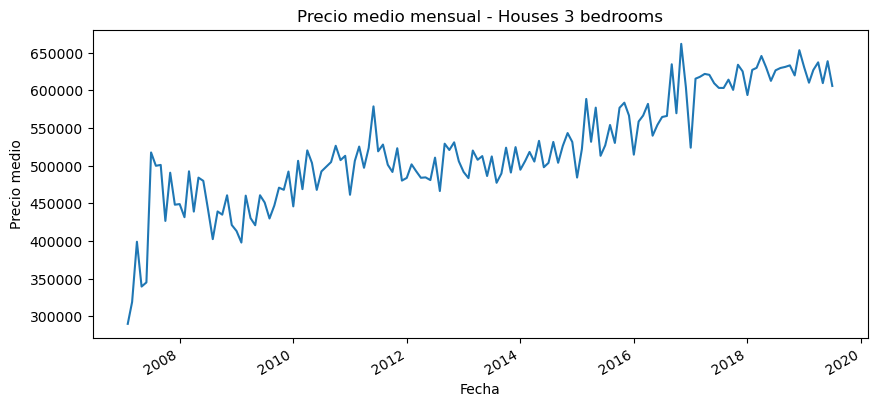

In [11]:
# 8) Representación gráfica (Punto 2 - primera parte)
plt.figure(figsize=(10,4))
plt.plot(serie)
plt.title("Precio medio mensual - Houses 3 bedrooms")
plt.xlabel("Fecha")
plt.ylabel("Precio medio")
plt.xticks(rotation=30, ha="right")
plt.show()

In [14]:
serie

datesold
2007-02-01    290000.000000
2007-03-01    319000.000000
2007-04-01    399000.000000
2007-05-01    339500.000000
2007-06-01    345000.000000
                  ...      
2019-03-01    627037.974684
2019-04-01    637188.392857
2019-05-01    609584.677419
2019-06-01    638709.677419
2019-07-01    605833.152174
Freq: MS, Name: price, Length: 150, dtype: float64

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
# 9) Descompondremos la serie temporal para conocer su estacionalidad, tendencia y residuos:
# Realizar la descomposición estacional
result = seasonal_decompose(serie, model='multiplicative',period=12)

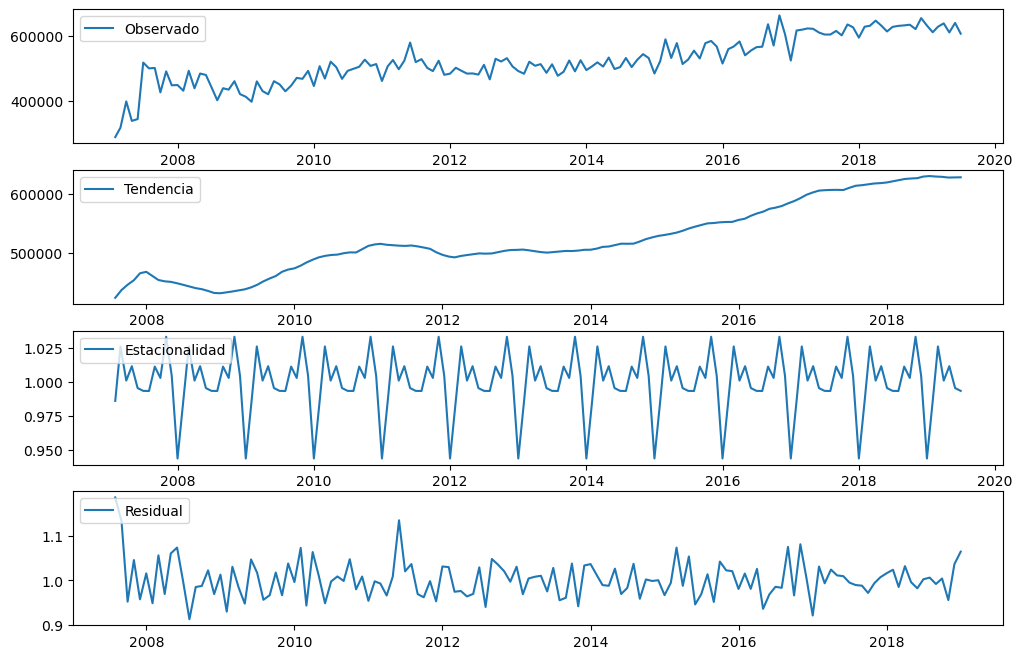

In [17]:
# Visualizar las componentes
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(result.observed, label='Observado')
plt.legend(loc='upper left')
plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Tendencia')
plt.legend(loc='upper left')

plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Estacionalidad')
plt.legend(loc='upper left')
plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residual')
plt.legend(loc='upper left')
plt.show()